In [1]:
# Importing Libraries

# Data handling and statistical analysis 
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats

# Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel

# Financial data 
import quantstats as qs
import ta
import yfinance as yf

# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Enabling Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Datetime and hiding warnings 
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Getting daily returns for 4 different US stocks in the same time window
aapl = qs.utils.download_returns('AAPL')
aapl = aapl.loc['2017-07-01':'2024-07-01']

tsla = qs.utils.download_returns('TSLA')
tsla = tsla.loc['2017-07-01':'2024-07-01']

dis = qs.utils.download_returns('DIS')
dis = dis.loc['2017-07-01':'2024-07-01']

lly = qs.utils.download_returns('LLY')
lly = lly.loc['2017-07-01':'2024-07-01']

nvda = qs.utils.download_returns('NVDA')
nvda = nvda.loc['2017-07-01':'2024-07-01']

msft = qs.utils.download_returns('MSFT')
msft = msft.loc['2017-07-01':'2024-07-01']

meta = qs.utils.download_returns('META')
meta = meta.loc['2017-07-01':'2024-07-01']

amzn = qs.utils.download_returns('AMZN')
amzn = amzn.loc['2017-07-01':'2024-07-01']

googl = qs.utils.download_returns('GOOGL')
googl = googl.loc['2017-07-01':'2024-07-01']

jpm = qs.utils.download_returns('JPM')
jpm = jpm.loc['2017-07-01':'2024-07-01']

costco = qs.utils.download_returns('COST')
costco = costco.loc['2017-07-01':'2024-07-01']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# Plotting Daily Returns for each stock
subtracting the difference between the stock's closing price on one day and its closing price the day before, dividing the result by the closing of the day before, and multiplying it by 100.




Apple Daily Returns Plot:



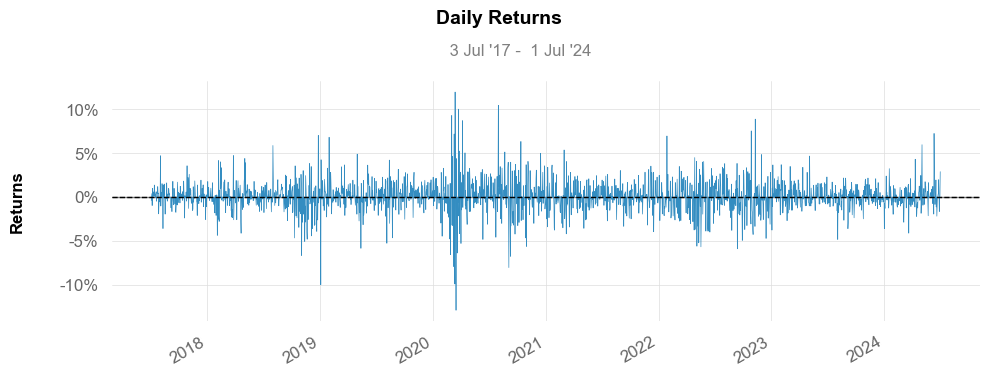






Tesla Inc. Daily Returns Plot:



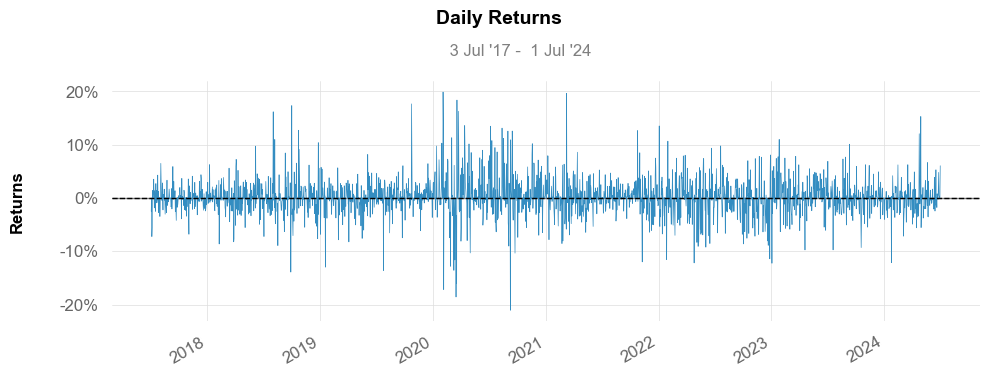






The Walt Disney Company Daily Returns Plot:



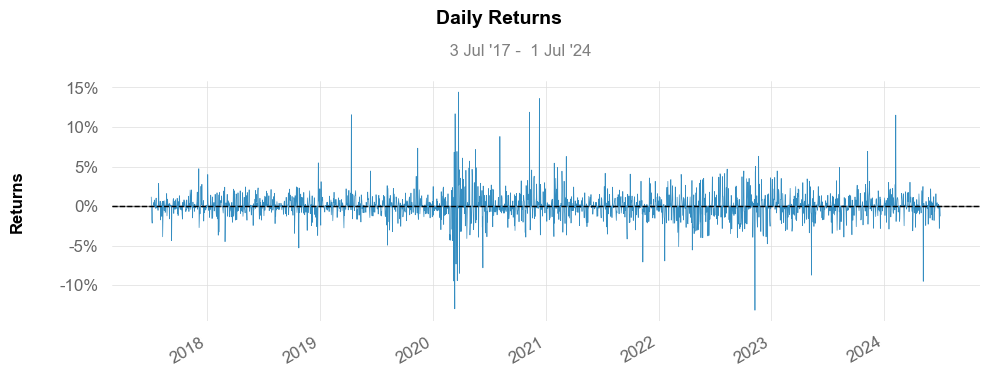






Eli Lily and company Daily Returns Plot:



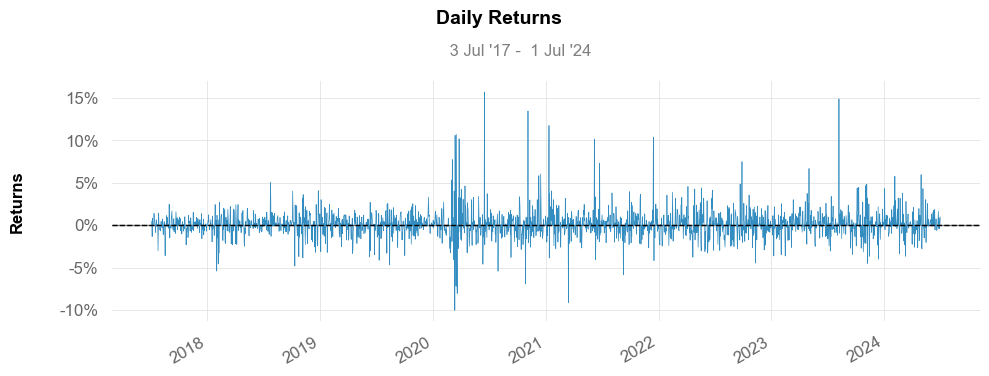






NVIDIA Corporation Daily Returns Plot:



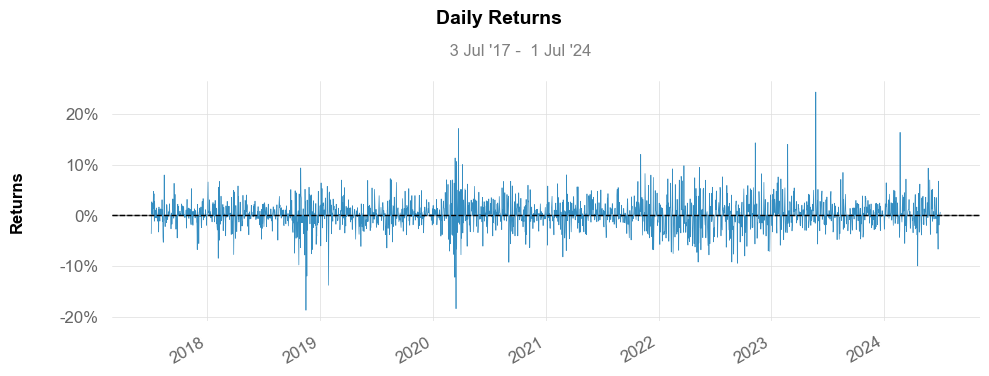






Microsoft Corporation Daily Returns Plot:



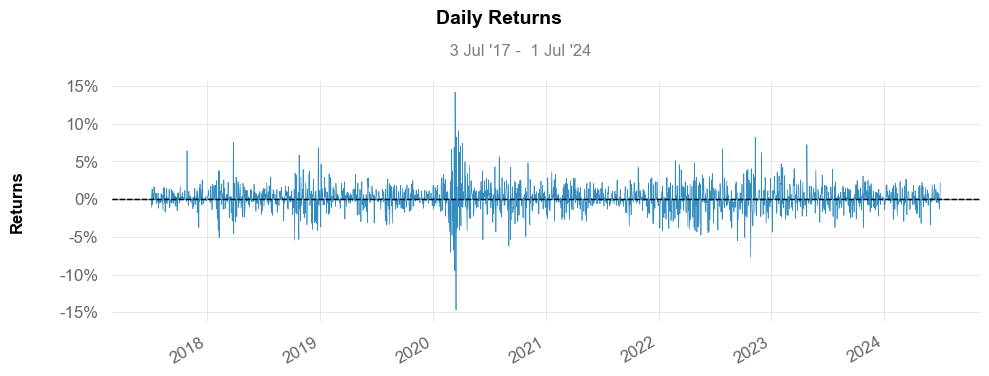






Meta Platforms Inc. Daily Returns Plot:



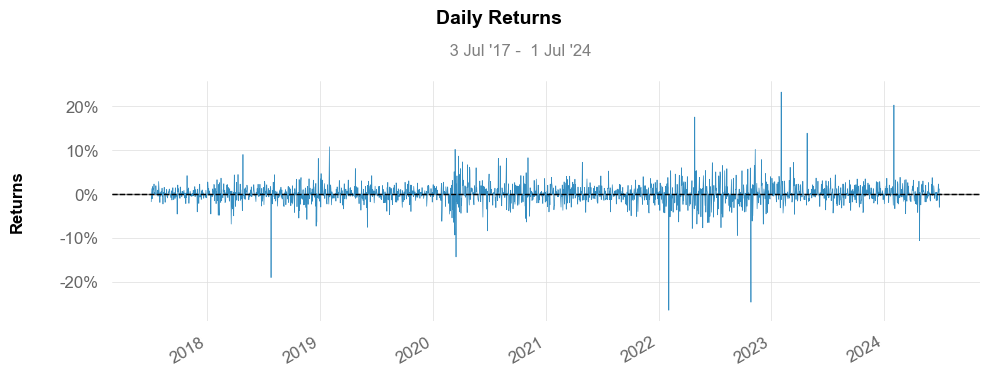






Amazon.com, Inc. Daily Returns Plot:



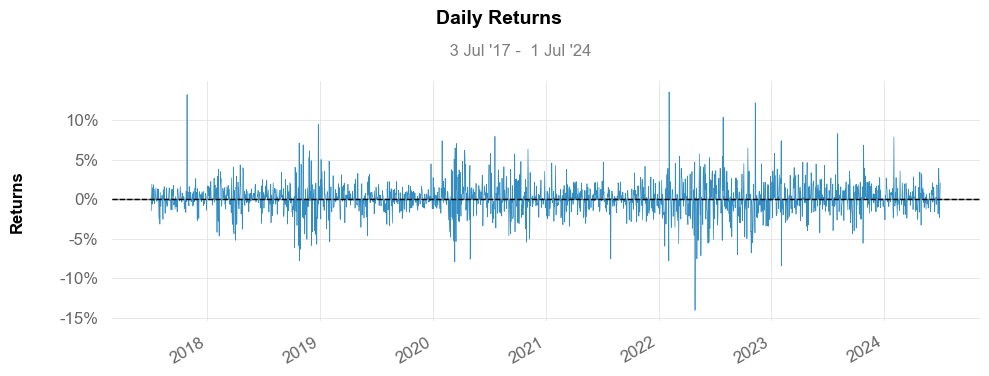






Alphabet Inc. Daily Returns Plot:



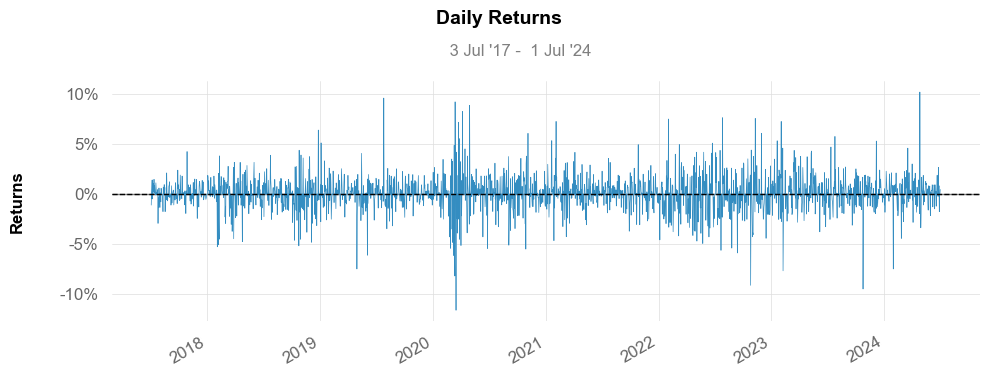






JP Morgan Chase & Co. Daily Returns Plot:



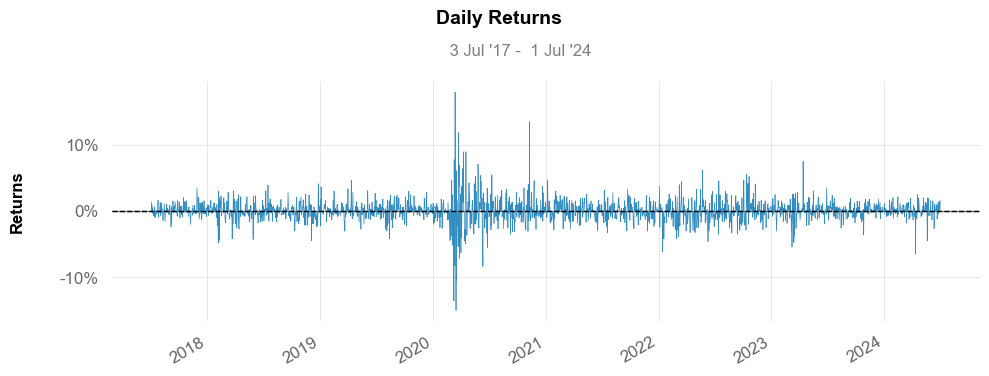






Costco Wholesale Corporation Daily Returns Plot:



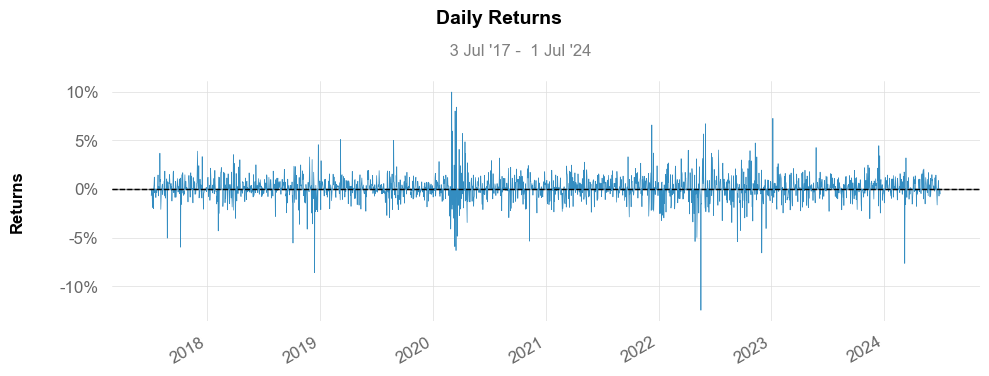

In [12]:
print('\n')
print('\nApple Daily Returns Plot:\n')
qs.plots.daily_returns(aapl, benchmark=None)
print('\n')
print('\n')
print('\nTesla Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(tsla, benchmark=None)
print('\n')
print('\n')
print('\nThe Walt Disney Company Daily Returns Plot:\n')
qs.plots.daily_returns(dis, benchmark=None)
print('\n')
print('\n')
print('\nEli Lily and company Daily Returns Plot:\n')
qs.plots.daily_returns(lly, benchmark=None)
print('\n')
print('\n')
print('\nNVIDIA Corporation Daily Returns Plot:\n')
qs.plots.daily_returns(nvda, benchmark=None)
print('\n')
print('\n')
print('\nMicrosoft Corporation Daily Returns Plot:\n')
qs.plots.daily_returns(msft, benchmark=None)
print('\n')
print('\n')
print('\nMeta Platforms Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(meta, benchmark=None)
print('\n')
print('\n')
print('\nAmazon.com, Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(amzn, benchmark=None)
print('\n')
print('\n')
print('\nAlphabet Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(googl, benchmark=None)
print('\n')
print('\n')
print('\nJP Morgan Chase & Co. Daily Returns Plot:\n')
qs.plots.daily_returns(jpm, benchmark=None)
print('\n')
print('\n')
print('\nCostco Wholesale Corporation Daily Returns Plot:\n')
qs.plots.daily_returns(costco, benchmark=None)

# Calculating Standard Deviations
$\sigma = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (x_i - \bar{x})^2}$
Where <b><i>x</i></b> represents the set of returns data, $\bar{x}$ is the mean of the returns data, and <b><i>N</i></b> is the number of observations. Standard deviation enables investors to assess the risk level and to compare the volatility of different stocks.

In [13]:
print('\n')
print("Apple's Standard Deviation from 2017 to 2024: ", aapl.std().round(3))
print('\n')
print("\nTesla's Standard Deviation from 2017 to 2024: ", tsla.std().round(3))
print('\n')
print("\nDisney's Standard Deviation from 2017 to 2024: ", dis.std().round(3))
print('\n')
print("\nEli Lily's Standard Deviation from 2017 to 2024: ", lly.std().round(3))
print('\n')
print("NVIDIA's Standard Deviation from 2017 to 2024: ", nvda.std().round(3))
print('\n')
print("\nMicrosoft's Standard Deviation from 2017 to 2024: ", msft.std().round(3))
print('\n')
print("\nMeta's Standard Deviation from 2017 to 2024: ", meta.std().round(3))
print('\n')
print("\nAmazon's Standard Deviation from 2017 to 2024: ", amzn.std().round(3))
print('\n')
print("\nGoogle's Standard Deviation from 2017 to 2024: ", googl.std().round(3))
print('\n')
print("\nJPMorgon's Standard Deviation from 2017 to 2024: ", jpm.std().round(3))
print('\n')
print("\nCostco's Standard Deviation from 2017 to 2024: ", costco.std().round(3))



Apple's Standard Deviation from 2017 to 2024:  0.019



Tesla's Standard Deviation from 2017 to 2024:  0.039



Disney's Standard Deviation from 2017 to 2024:  0.019



Eli Lily's Standard Deviation from 2017 to 2024:  0.018


NVIDIA's Standard Deviation from 2017 to 2024:  0.032



Microsoft's Standard Deviation from 2017 to 2024:  0.018



Meta's Standard Deviation from 2017 to 2024:  0.026



Amazon's Standard Deviation from 2017 to 2024:  0.021



Google's Standard Deviation from 2017 to 2024:  0.019



JPMorgon's Standard Deviation from 2017 to 2024:  0.018



Costco's Standard Deviation from 2017 to 2024:  0.014


In [17]:
# Merging daily returns into one dataframe
merged_df = pd.concat([aapl, tsla, dis, lly, nvda, msft, meta, amzn, googl, jpm, costco], join = 'outer', axis = 1)
merged_df.columns = ['aapl', 'tsla', 'dis', 'lly', 'nvda', 'msft', 'meta', 'amzn', 'googl', 'jpm', 'costco']
merged_df # Displaying dataframe

,aapl,tsla,dis,lly,nvda,msft,meta,amzn,googl,jpm,costco
Date,,,,,,,,,,,
2017-07-03,-0.003611,-0.024861,0.011388,0.004860,-0.036179,-0.011026,-0.016890,-0.014814,-0.010993,0.014770,-0.006940
2017-07-05,0.004111,-0.072401,-0.017030,0.000000,0.026699,0.013349,0.012868,0.018602,0.013921,0.010027,-0.005037
2017-07-06,-0.009439,-0.055826,-0.021585,-0.013301,0.003006,-0.007383,-0.010110,-0.006444,-0.004902,-0.003202,-0.005885
2017-07-07,0.010159,0.014215,-0.000290,0.008456,0.022860,0.012979,0.017605,0.014112,0.014143,0.005033,-0.018970
2017-07-10,0.006104,0.009035,0.002613,-0.000122,0.047288,0.007486,0.013603,0.018094,0.010831,-0.007032,-0.020180
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-25,0.004468,0.026126,0.002157,0.016290,0.067564,0.007327,0.023431,0.004149,0.026839,-0.004073,0.008666
2024-06-26,0.019993,0.048145,-0.000196,-0.003703,0.002459,0.002683,0.004935,0.039015,-0.000815,-0.003231,0.001555
2024-06-27,0.003986,0.005347,-0.000098,0.008632,-0.019066,0.001526,0.012551,0.021900,0.008321,0.008813,-0.007259


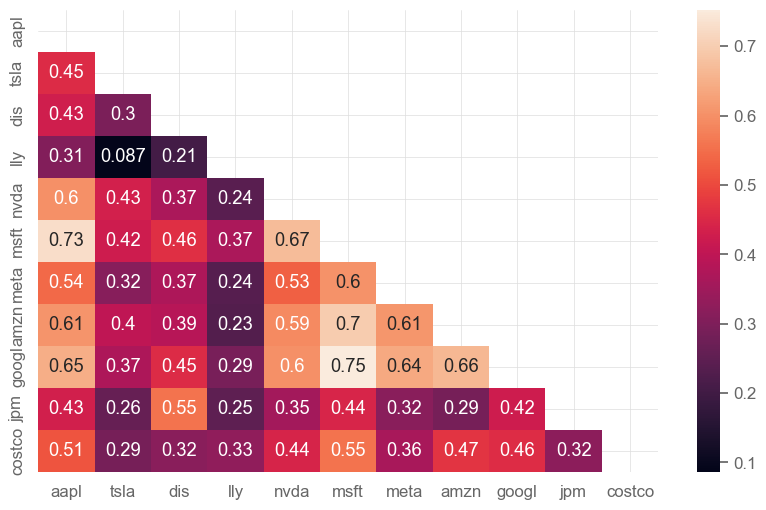

In [19]:
# Correlation Matrix
corr = merged_df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask = mask)
plt.show()

 Beta is a measure of a stock's volatility compared to the market. A Beta of 1 means that the stock is as volatile as the market, a Beta greater than 1 indicates higher volatility than the market, and a Beta less than 1 suggests lower volatility.

 Alpha, on the other hand, is a measurement of a stock's excess return relative to its expected performance based on its Beta. A positive Alpha indicates that a stock has outperformed its expected performance based on its Beta, while a negative Alpha suggests underperformance.

 To determine Beta and Alpha, we require data from the SP500, which acts as the benchmark, to fit a linear regression model between the stocks and the index. This will enable us to extract the Beta and Alpha values of the stocks.

 Formula?

In [27]:
sp500 = qs.utils.download_returns('^GSPC')
sp500 = sp500.loc['2017-07-01':'2024-07-01']
# Fitting linear relation among Apple's returns and Benchmark
X = sp500.values.reshape(-1,1)
y = aapl.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('AAPL beta: ', beta.round(3))
print('\nAAPL alpha: ', alpha.round(3))

# Fitting linear relation among Tasla's returns and Benchmark
X = sp500.values.reshape(-1,1)
y = tsla.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('Tsla beta: ', beta.round(3))
print('\nTsla alpha: ', alpha.round(3))

# Fitting linear relation among Disney's returns and Benchmark
X = sp500.values.reshape(-1,1)
y = dis.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('Disney beta: ', beta.round(3))
print('\nDisney alpha: ', alpha.round(3))

# Fitting linear relation among LLY's returns and Benchmark
X = sp500.values.reshape(-1,1)
y = lly.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('lly beta: ', beta.round(3))
print('\nlly alpha: ', alpha.round(3))

# Fitting linear relation among Microsoft's returns and Benchmark
X = sp500.values.reshape(-1,1)
y = msft.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('Microsoft beta: ', beta.round(3))
print('\nMicrosoft alpha: ', alpha.round(3))

# Fitting linear relation among Meta's returns and Benchmark
X = sp500.values.reshape(-1,1)
y = meta.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('Meta beta: ', beta.round(3))
print('\Meta alpha: ', alpha.round(3))

# Fitting linear relation among Amazon's returns and Benchmark
X = sp500.values.reshape(-1,1)
y = amzn.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('Amazon beta: ', beta.round(3))
print('\nAmazon alpha: ', alpha.round(3))

# Fitting linear relation among Google's returns and Benchmark
X = sp500.values.reshape(-1,1)
y = googl.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('Google beta: ', beta.round(3))
print('\nGoogle alpha: ', alpha.round(3))

# Fitting linear relation among JPMorgon's returns and Benchmark
X = sp500.values.reshape(-1,1)
y = jpm.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('JPMorgon beta: ', beta.round(3))
print('\nJPMorgon alpha: ', alpha.round(3))

# Fitting linear relation among Costco's returns and Benchmark
X = sp500.values.reshape(-1,1)
y = costco.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('Costco beta: ', beta.round(3))
print('\nCostco alpha: ', alpha.round(3))

[*********************100%%**********************]  1 of 1 completed



AAPL beta:  [1.22]

AAPL alpha:  [0.001]


Tsla beta:  [1.487]

Tsla alpha:  [0.001]


Disney beta:  [1.015]

Disney alpha:  [-0.]


lly beta:  [0.652]

lly alpha:  [0.001]


Microsoft beta:  [1.218]

Microsoft alpha:  [0.001]


Meta beta:  [1.306]
\Meta alpha:  [0.]


Amazon beta:  [1.141]

Amazon alpha:  [0.]


Google beta:  [1.166]

Google alpha:  [0.]


JPMorgon beta:  [1.077]

JPMorgon alpha:  [0.]


Costco beta:  [0.735]

Costco alpha:  [0.001]


# Sharpe ratio 
The Sharpe ratio is a measure of the risk-adjusted return of an investment. It is calculated by dividing the average excess return of the investment over the standard deviation of the returns, as shown by the following equation:
$\text{Sharpe ratio} = \frac{R_p - R_f}{\sigma_p}$

A higher Sharpe ratio indicates that an investment provides higher returns for a given level of risk compared to other investments with a lower Sharpe ratio. In general, a Sharpe ratio greater than 1 is considered good, while a Sharpe ratio less than 1 is considered poor. A Sharpe ratio of 1 means that the investment's average return is equal to the risk-free rate of return.

In [30]:
print('\n')
print("Apple's Sharpe Ratio", qs.stats.sharpe(aapl).round(2))
print('\n')
print("\nTesla's Sharpe Ratio", qs.stats.sharpe(tsla).round(2))
print('\n')
print("\nDisney's Sharpe Ratio", qs.stats.sharpe(dis).round(2))
print('\n')
print("\nEli Lily's Sharpe Ratio", qs.stats.sharpe(lly).round(2))
print('\n')
print("NVIDIA's Sharpe Ratio", qs.stats.sharpe(nvda).round(2))
print('\n')
print("\nMicrosoft's Sharpe Ratio", qs.stats.sharpe(msft).round(2))
print('\n')
print("\nMeta's Sharpe Ratio", qs.stats.sharpe(meta).round(2))
print('\n')
print("\nAmazon's Sharpe Ratio", qs.stats.sharpe(amzn).round(2))
print('\n')
print("\nGoogle's Sharpe Ratio ", qs.stats.sharpe(googl).round(2))
print('\n')
print("\nJPMorgon's Sharpe Ratio", qs.stats.sharpe(jpm).round(2))
print('\n')
print("\nCostco's Sharpe Ratio", qs.stats.sharpe(costco).round(2))



Apple's Sharpe Ratio 1.0



Tesla's Sharpe Ratio 0.81



Disney's Sharpe Ratio 0.12



Eli Lily's Sharpe Ratio 1.35


NVIDIA's Sharpe Ratio 1.26



Microsoft's Sharpe Ratio 1.09



Meta's Sharpe Ratio 0.63



Amazon's Sharpe Ratio 0.76



Google's Sharpe Ratio  0.8



JPMorgon's Sharpe Ratio 0.54



Costco's Sharpe Ratio 1.16


In [32]:
SharpRatio = {'aapl': qs.stats.sharpe(aapl).round(2), 
              'tsla': qs.stats.sharpe(tsla).round(2),
                'dis': qs.stats.sharpe(dis).round(2),
                'lly': qs.stats.sharpe(lly).round(2), 
                'nvda': qs.stats.sharpe(nvda).round(2),
                'msft': qs.stats.sharpe(msft).round(2), 
                'meta': qs.stats.sharpe(meta).round(2), 
                'amzn': qs.stats.sharpe(amzn).round(2), 
                'googl': qs.stats.sharpe(googl).round(2),
                'jpm': qs.stats.sharpe(jpm).round(2),
                'costco': qs.stats.sharpe(costco).round(2)}

In [35]:
sorted_ShapeRation = sorted(SharpRatio.items(), key=lambda x:x[1],  reverse=True)
print(sorted_ShapeRation)

[('lly', 1.35), ('nvda', 1.26), ('costco', 1.16), ('msft', 1.09), ('aapl', 1.0), ('tsla', 0.81), ('googl', 0.8), ('amzn', 0.76), ('meta', 0.63), ('jpm', 0.54), ('dis', 0.12)]
